Let's see how we can use PCA to get rid of noise in our dataset

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pylab
import seaborn as sns
from sklearn.linear_model import LinearRegression

Let's make some toy data that for the number of books I own over time. I add two books to my collection each year, but there was one year in which I got 5 extra books as a gift

In [2]:
years = pylab.arange(1, 11)
# 2 extra books per year
books = 2 * years
# year 6 I got 5 extra books
books[-len(books) // 2:] += 5

<AxesSubplot:>

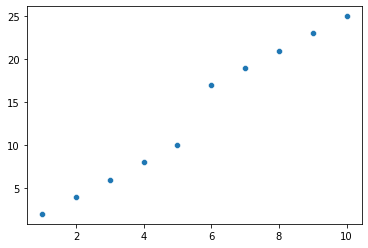

In [3]:
sns.scatterplot(x=years, y=books)

<AxesSubplot:>

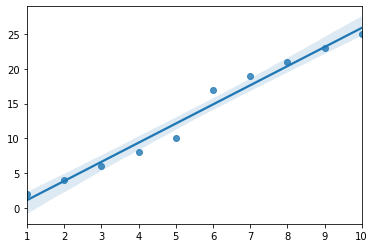

In [4]:
sns.regplot(x=years, y=books)

In [5]:
LinearRegression().fit(pylab.array([years]).T, books).coef_

array([2.75757576])

In [6]:
data = pylab.array([years, books]).T
data

array([[ 1,  2],
       [ 2,  4],
       [ 3,  6],
       [ 4,  8],
       [ 5, 10],
       [ 6, 17],
       [ 7, 19],
       [ 8, 21],
       [ 9, 23],
       [10, 25]])

In [7]:
pca = PCA(n_components=1)
pca.fit(data)
data_transformed = pca.transform(data)
data_transformed

array([[-12.34283405],
       [-10.12351968],
       [ -7.90420532],
       [ -5.68489095],
       [ -3.46557659],
       [  3.46557659],
       [  5.68489095],
       [  7.90420532],
       [ 10.12351968],
       [ 12.34283405]])

In [8]:
pca.explained_variance_ratio_

array([0.9976162])

In [9]:
orig_data = pca.inverse_transform(data_transformed)
orig_data

array([[ 1.37034891,  1.86851109],
       [ 2.11288453,  3.95992141],
       [ 2.85542016,  6.05133172],
       [ 3.59795578,  8.14274203],
       [ 4.34049141, 10.23415234],
       [ 6.65950859, 16.76584766],
       [ 7.40204422, 18.85725797],
       [ 8.14457984, 20.94866828],
       [ 8.88711547, 23.04007859],
       [ 9.62965109, 25.13148891]])

<AxesSubplot:>

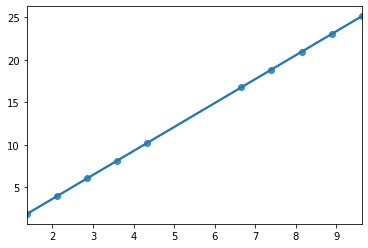

In [10]:
sns.regplot(x=orig_data[:, 0], y=orig_data[:, 1])

In [11]:
LinearRegression().fit(orig_data[:, 0].reshape(-1, 1), orig_data[:, 1]).coef_

array([2.81657909])

Note that this regression coefficient is NOT the 2 books per year that normally get added to my library. But that's ok! For future data, we can use our fitted PCA model to transform the new inputs into a new space where everything is fully linear, make a clean prediction, and then inverse-transform the prediction